<a href="https://colab.research.google.com/github/Ryo-yuu/Demo/blob/main/Class_6_Tutorial_Anova_Answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOVA using Python

In [1]:
# import libraries
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sns

np.random.seed(1)

In [2]:
# method_1_value = np.random.normal(22,3,10)
# method_1_time = np.random.normal(22,3,10)
method_1 = np.random.normal(11,3,10)
method_2 = np.random.normal(11,3,10)
method_3 = np.random.normal(23,3,10)
method_4 = np.random.normal(11,3,10)

data = pd.DataFrame({'method_1':method_1,
                     'method_2':method_2,
                     'method_3':method_3,
                     'method_4':method_4})
data

,method_1,method_2,method_3,method_4
0,15.873036,15.386324,19.698142,8.925018
1,9.164731,4.819578,26.434171,9.809739
2,9.415485,10.032748,25.704772,8.938482
3,7.781094,9.847837,24.507483,8.464383
4,13.596223,14.401308,25.702568,8.986262
5,4.095384,7.700326,20.948816,10.962006
6,16.234435,10.482715,22.631329,7.648069
7,8.716379,8.366425,20.192692,11.703247
8,11.957117,11.126641,22.196336,15.979407
9,10.251889,12.748446,24.591066,13.226132


In [3]:
df = pd.melt(data,
             value_vars=['method_1', 'method_2', 'method_3', 'method_4'])

df.columns = [ 'treatment', 'value']
df

,treatment,value
0,method_1,15.873036
1,method_1,9.164731
2,method_1,9.415485
3,method_1,7.781094
4,method_1,13.596223
5,method_1,4.095384
6,method_1,16.234435
7,method_1,8.716379
8,method_1,11.957117
9,method_1,10.251889


In [4]:
model = ols('value~C(treatment)', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     43.93
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           4.05e-12
Time:                        00:26:58   Log-Likelihood:                -99.014
No. Observations:                  40   AIC:                             206.0
Df Residuals:                      36   BIC:                             212.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.7086      0.959     11.170      0.000       8.764      12.653
C(treatment)[T.method_2]    -0.2173      1.356     -0.160      0.874      -2.967       2.532
C(treatment)[T.method_3]    12.5522      1.356      9.258      0.000       9.803      15.302
C(treatment)[T.method_4]    -0.2443      1.356     -0.180      0.858      -2.994       2.505
==============================================================================
Omnibus:                        0.137   Durbin-Watson:                   2.527
Prob(Omnibus):                  0.934   Jarque-Bera (JB):                0.304
Skew:                           0.112   Prob(JB):                        0.859
Kurtosis:                       2.636   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
anova = sm.stats.anova_lm(model, typ=1)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),3.0,1211.185115,403.728372,43.927987,4.050963e-12
Residual,36.0,330.864727,9.190687,NaN,NaN


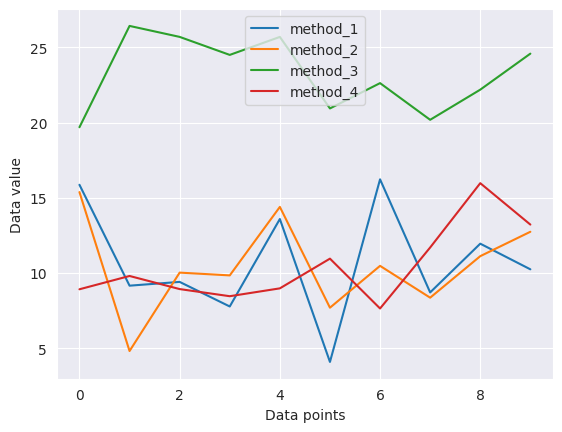

In [7]:
sns.set_style('darkgrid')
data.plot()
plt.xlabel('Data points')
plt.ylabel('Data value')
plt.show()

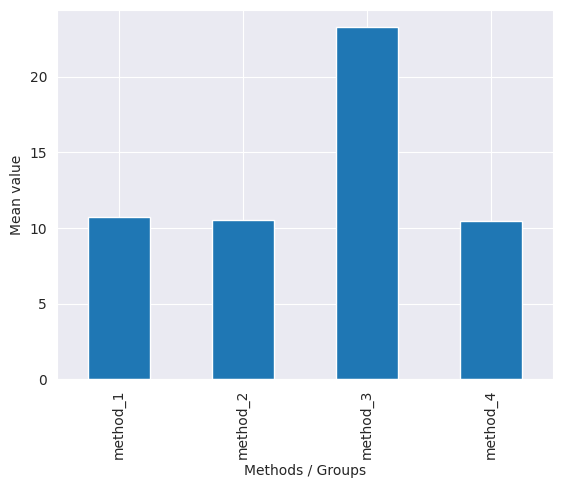

In [8]:
data.mean(axis=0).plot(kind='bar')
plt.xlabel('Methods / Groups')
plt.ylabel('Mean value')
plt.show()

# Limitation of ANOVA

In [9]:
# Alter the mean value of method_4
method_1 = np.random.normal(10,3,10)
method_2 = np.random.normal(11,3,10)
method_3 = np.random.normal(12,3,10)
method_4 = np.random.normal(15,3,10)

data = pd.DataFrame({'method_1':method_1,
                     'method_2':method_2,
                     'method_3':method_3,
                     'method_4':method_4})
data.head()

,method_1,method_2,method_3,method_4
0,9.424493,11.900511,9.736806,10.667659
1,7.337113,9.943250,15.758604,13.486602
2,7.758525,7.572445,13.538789,15.480111
3,15.077364,9.951972,11.105721,17.628507
4,10.152423,10.373317,13.465554,15.946905


In [10]:
df = pd.melt(data,
             value_vars=['method_1', 'method_2', 'method_3', 'method_4'])

df.columns = [ 'treatment', 'value']
df.sample(10)

,treatment,value
18,method_2,11.856762
34,method_4,15.946905
16,method_2,13.516950
12,method_2,7.572445
23,method_3,11.105721
10,method_2,11.900511
28,method_3,18.556726
22,method_3,13.538789
35,method_4,8.933396
3,method_1,15.077364


In [11]:
model = ols('value~C(treatment)', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     3.933
Date:                Wed, 04 Jun 2025   Prob (F-statistic):             0.0159
Time:                        00:29:02   Log-Likelihood:                -96.669
No. Observations:                  40   AIC:                             201.3
Df Residuals:                      36   BIC:                             208.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.6925      0.904     11.827      0.000       8.859      12.526
C(treatment)[T.method_2]     0.8399      1.279      0.657      0.515      -1.753       3.433
C(treatment)[T.method_3]     2.6776      1.279      2.094      0.043       0.084       5.271
C(treatment)[T.method_4]     3.9760      1.279      3.110      0.004       1.383       6.569
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.429
Skew:                          -0.110   Prob(JB):                        0.807
Kurtosis:                       2.543   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model = ols('value~C(treatment)', data=df).fit()
model.summary()

anova = sm.stats.anova_lm(model, typ=1)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),3.0,96.454435,32.151478,3.933386,0.015864
Residual,36.0,294.263865,8.173996,NaN,NaN


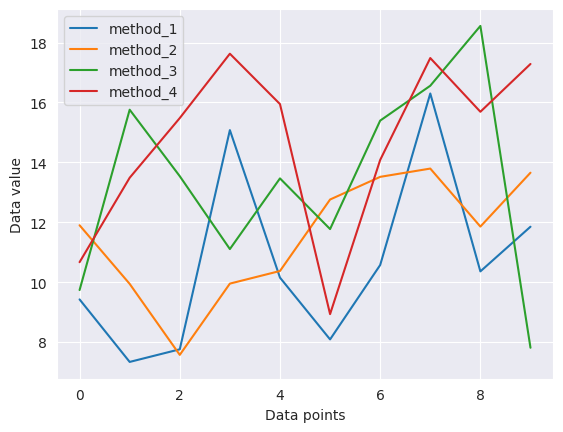

In [13]:
sns.set_style('darkgrid')
data.plot()
plt.xlabel('Data points')
plt.ylabel('Data value')
plt.show()

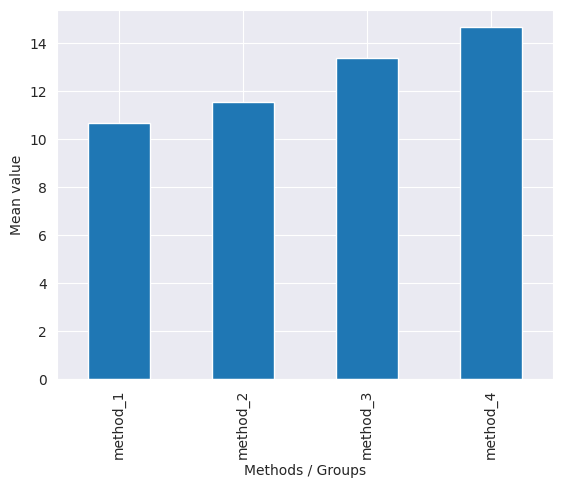

In [14]:
data.mean(axis=0).plot(kind='bar')
plt.xlabel('Methods / Groups')
plt.ylabel('Mean value')
plt.show()

In [15]:
method_1_value = np.random.normal(22,3,10)
method_1_time = np.random.normal(100,3,10)
method_2_value = np.random.normal(22,3,10)
method_2_time = np.random.normal(100,3,10)
method_3_value = np.random.normal(22,3,10)
method_3_time = np.random.normal(100,3,10)
method_4_value = np.random.normal(44,3,10)
method_4_time = np.random.normal(200,3,10)



In [16]:
data_value = pd.DataFrame({'method_1':method_1_value,
                     'method_2':method_2_value,
                     'method_3':method_3_value,
                     'method_4':method_4_value})

In [17]:
df_value = pd.melt(data_value,
             value_vars=['method_1', 'method_2', 'method_3', 'method_4'])

df_value.columns = [ 'treatment', 'value']
df.sample(10)

,treatment,value
10,method_2,11.900511
37,method_4,17.483924
15,method_2,12.759870
28,method_3,18.556726
35,method_4,8.933396
36,method_4,14.081388
5,method_1,8.089013
0,method_1,9.424493
7,method_1,16.300765
23,method_3,11.105721


In [18]:
data_time = pd.DataFrame({'method_1':method_1_time,
                     'method_2':method_2_time,
                     'method_3':method_3_time,
                     'method_4':method_4_time})
df_time = pd.melt(data_time,
             value_vars=['method_1', 'method_2', 'method_3', 'method_4'])

df_time.columns = [ 'treatment_1', 'time']
df_time.sample(10)

,treatment_1,time
38,method_4,202.040210
13,method_2,101.651612
19,method_2,100.139702
12,method_2,96.309826
37,method_4,199.138076
8,method_1,103.364253
27,method_3,99.642837
10,method_2,99.457239
36,method_4,203.994371
34,method_4,200.131007


In [19]:
df = pd.concat([df_time,df_value],axis=1)

In [20]:
df

,treatment_1,time,treatment,value
0,method_1,95.880648,method_1,20.658614
1,method_1,100.945478,method_1,25.673523
2,method_1,102.538482,method_1,23.210475
3,method_1,97.421452,method_1,23.780736
4,method_1,101.051638,method_1,18.715264
5,method_1,96.063150,method_1,22.508147
6,method_1,99.883913,method_1,24.221669
7,method_1,95.152683,method_1,19.138898
8,method_1,103.364253,method_1,21.201344
9,method_1,101.226702,method_1,22.097844


In [21]:
model = ols('value~C(treatment)', data=df).fit()
model.summary()

anova = sm.stats.anova_lm(model, typ=1)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),3.0,3418.071381,1139.357127,141.757073,5.426562e-20
Residual,36.0,289.346103,8.037392,NaN,NaN


In [22]:
model = ols('time~C(treatment)', data=df).fit()
model.summary()

anova = sm.stats.anova_lm(model, typ=1)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),3.0,77273.242701,25757.747567,2838.274829,8.421866e-43
Residual,36.0,326.705118,9.075142,NaN,NaN


In [23]:
model = ols('time + value ~C(treatment)', data=df).fit()
model.summary()

anova = sm.stats.anova_lm(model, typ=1)
anova

ValueError: endog has evaluated to an array with multiple columns that has shape (40, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [24]:
from statsmodels.multivariate.manova import MANOVA

In [25]:
fit= MANOVA.from_formula('time + value ~ treatment', data = df)

In [26]:
print(fit.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0033 2.0000 35.0000 5329.6488 0.0000
         Pillai's trace   0.9967 2.0000 35.0000 5329.6488 0.0000
 Hotelling-Lawley trace 304.5514 2.0000 35.0000 5329.6488 0.0000
    Roy's greatest root 304.5514 2.0000 35.0000 5329.6488 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
       treatment         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0041 6.0000 70.0000  170.1832 0.0000
         Pillai's trace   1.0126 6.0000 72.00

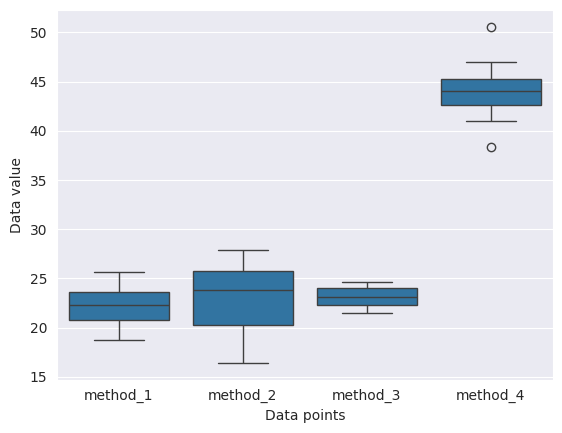

In [27]:
sns.set_style('darkgrid')
sns.boxplot(data=df,x='treatment',y='value')
plt.xlabel('Data points')
plt.ylabel('Data value')
plt.show()

# Post Hoc Analysis

In [28]:
from statsmodels.stats.multicomp import MultiComparison

comparison = MultiComparison(df['value'], df['treatment'])
tukey = comparison.tukeyhsd(0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
method_1,method_2,0.914,0.8881,-2.5006,4.3287,False
method_1,method_3,0.9622,0.8723,-2.4525,4.3768,False
method_1,method_4,21.9552,0.0,18.5405,25.3698,True
method_2,method_3,0.0481,1.0,-3.3665,3.4628,False
method_2,method_4,21.0411,0.0,17.6265,24.4558,True
method_3,method_4,20.993,0.0,17.5784,24.4077,True


### Thank You for your time!